In [1]:
using Plots
using DataFrames
using Statistics
using Polynomials
using CSV

In [2]:
function naive_multiplication(A,B)
    C=zeros(Float64,size(A,1),size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j]=C[i,j]+A[i,k]*B[k,j]
            end
        end
    end
    return(C)
end

naive_multiplication (generic function with 1 method)

In [3]:
function better_multiplication( A,B )
    C=zeros(Float64,size(A,1),size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j]=C[i,j]+A[i,k]*B[k,j]
            end
        end
    end
    return(C)
end

better_multiplication (generic function with 1 method)

In [4]:
Asmall=[[1.0 0.0]; [0.0 1.0]]
Bsmall=Asmall
naive_multiplication(Asmall, Bsmall)
better_multiplication(Asmall, Bsmall)
Asmall*Bsmall
A=rand(1000,1000);
B=rand(1000,1000);

In [5]:
@elapsed naive_multiplication(A, B)

2.721243061

In [6]:
@elapsed better_multiplication(A, B)

1.331058023

In [7]:
@elapsed A * B

0.102667501

In [8]:
naive = []
better = []
blas = []

data = DataFrame(size = Int[], naive = Float64[], better = Float64[], blas = Float64[])

range = 10:60
for size = range
    for i = 1:10
        m1 = rand(size, size)
        m2 = rand(size, size)
        naive = @elapsed naive_multiplication(m1, m2)
        better = @elapsed better_multiplication(m1, m2)
        blas = @elapsed m1 * m2
        push!(data, [size naive better blas])
    end
end

In [9]:
processed = by(data, :size, df->DataFrame(naive_avg=mean(df[:naive]),
        naive_std=std(df[:naive]), better_avg=mean(df[:better]),
        better_std=std(df[:better]), blas_avg=mean(df[:blas]), blas_std=std(df[:blas])))

,size,naive_avg,naive_std,better_avg,better_std,blas_avg,blas_std
,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,10,2.2232e-6,7.06201e-7,1.7779e-6,4.208e-7,3.1118e-6,5.05543e-6
2,11,2.6957e-6,4.32999e-7,2.0624e-6,4.52602e-8,1.4317e-6,2.17744e-6
3,12,3.4476e-6,4.91435e-7,2.7735e-6,4.98636e-7,6.482e-7,1.1036e-7
4,13,4.3919e-6,1.20085e-7,3.3653e-6,5.14092e-7,8.51e-7,2.21201e-7
5,14,5.6915e-6,4.82495e-7,4.1407e-6,4.55391e-7,1.3878e-6,7.85936e-7
6,15,7.1149e-6,7.28219e-7,4.9998e-6,5.48896e-7,1.4891e-6,9.19331e-7
7,16,8.4664e-6,2.08215e-7,5.8695e-6,5.93769e-8,1.1139e-6,2.33035e-7
8,17,1.03043e-5,4.87358e-7,6.914e-6,8.2586e-8,1.3337e-6,1.37298e-7
9,18,1.21296e-5,1.73814e-7,8.1407e-6,7.49904e-8,1.398e-6,1.61048e-7


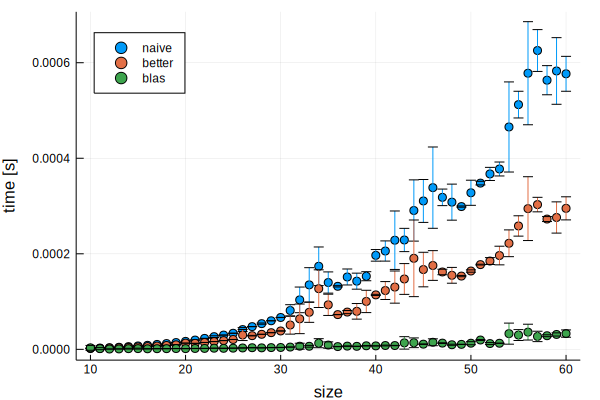

In [10]:
scatter(processed[:size], [processed[:naive_avg], processed[:better_avg], processed[:blas_avg]],
    yerr=[processed[:naive_std] processed[:better_std] processed[:blas_std]], layout=1,
    xlabel="size", ylabel="time [s]", labels=["naive" "better" "blas"], legend=:topleft)

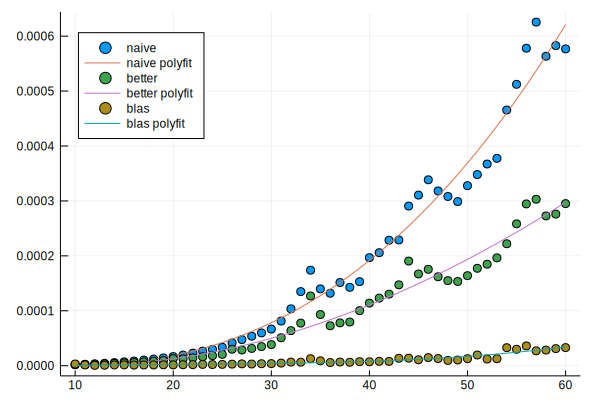

In [11]:
naive_poly = polyfit(processed[:size], processed[:naive_avg], 3)
better_poly = polyfit(processed[:size], processed[:better_avg], 3)
blas_poly = polyfit(processed[:size], processed[:blas_avg], 3)

naive_p = [naive_poly(x) for x = processed[:size]]
better_p = [better_poly(x) for x = processed[:size]]
blas_p = [blas_poly(x) for x = processed[:size]]


scatter(processed[:size], processed[:naive_avg], legend=:topleft, label="naive")
plot!(processed[:size], naive_p, label="naive polyfit")
scatter!(processed[:size], processed[:better_avg], label="better")
plot!(processed[:size], better_p, label="better polyfit")
scatter!(processed[:size], processed[:blas_avg], label="blas")
plot!(processed[:size], blas_p, label="blas polyfit")

In [12]:
data = CSV.read("results.csv")

,size,naive,better,blas
,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,10,5627,18795,1047
2,10,5555,5420,1001
3,10,5559,22270,1139
4,10,6534,6345,1112
5,10,6550,6302,1152
6,10,22426,22545,1265
7,10,7200,6946,1284
8,10,7293,6879,1260
9,10,7311,6946,1236


In [13]:
processed = by(data, :size, df->DataFrame(naive_avg=mean(df[:naive]),
        naive_std=std(df[:naive]), better_avg=mean(df[:better]),
        better_std=std(df[:better]), blas_avg=mean(df[:blas]), blas_std=std(df[:blas])))

,size,naive_avg,naive_std,better_avg,better_std,blas_avg,blas_std
,Int64⍰,Float64,Float64,Float64,Float64,Float64,Float64
1,10,8124.4,5077.69,10940.2,7165.7,1176.7,101.417
2,11,10222.6,754.783,10480.4,824.214,1921.4,238.173
3,12,14203.9,781.939,12807.9,430.414,2705.1,304.466
4,13,23596.9,24214.9,16883.8,5967.74,2805.2,209.507
5,14,19802.3,146.96,18945.7,504.399,3352.4,87.4493
6,15,26226.6,1738.54,24586.4,1297.72,4795.4,701.376
7,16,36556.9,8594.53,33002.6,4138.33,6120.6,555.036
8,17,41412.6,9191.08,41262.5,12163.8,6260.2,930.235
9,18,40850.3,553.437,38904.2,161.533,6809.0,95.7416


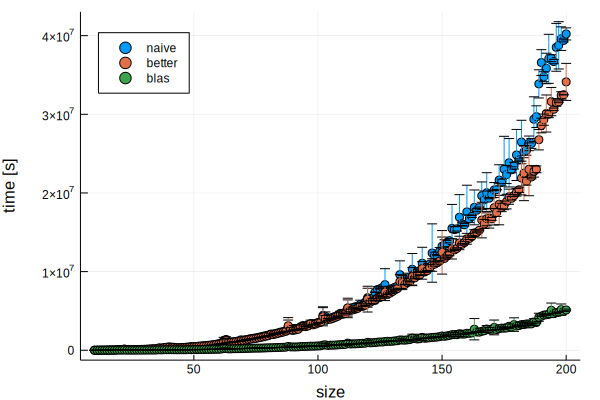

In [14]:
scatter(processed[:size], [processed[:naive_avg], processed[:better_avg], processed[:blas_avg]],
    yerr=[processed[:naive_std] processed[:better_std] processed[:blas_std]], layout=1,
    xlabel="size", ylabel="time [s]", labels=["naive" "better" "blas"], legend=:topleft)

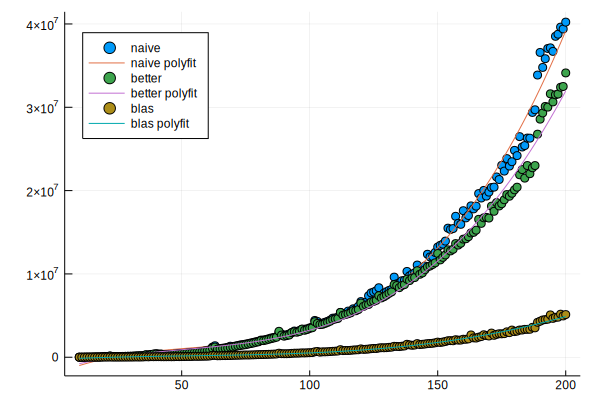

In [15]:
naive_poly = polyfit(processed[:size], processed[:naive_avg], 3)
better_poly = polyfit(processed[:size], processed[:better_avg], 3)
blas_poly = polyfit(processed[:size], processed[:blas_avg], 3)

naive_p = [naive_poly(x) for x = processed[:size]]
better_p = [better_poly(x) for x = processed[:size]]
blas_p = [blas_poly(x) for x = processed[:size]]


scatter(processed[:size], processed[:naive_avg], legend=:topleft, label="naive")
plot!(processed[:size], naive_p, label="naive polyfit")
scatter!(processed[:size], processed[:better_avg], label="better")
plot!(processed[:size], better_p, label="better polyfit")
scatter!(processed[:size], processed[:blas_avg], label="blas")
plot!(processed[:size], blas_p, label="blas polyfit")